# --------------------------------------Prediction of Store Sales--------------------------------------

In [1]:
import warnings
warnings.simplefilter(action='ignore')

# • Loading the data

In [2]:
import pandas as pd

df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# • Insights from data

In [3]:
print("Data has ",df.shape[0], " rows and",df.shape[1],"columns")

Data has  14204  rows and 12 columns


In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Data types of the features and label

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


detailed information of data

In [7]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 2
Item_Visibility              13010
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

Count of unique values in columns

In [8]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
12860,NCN26,10.85,Low Fat,0.028797,Household,115.4808,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
10932,FDV43,16.00,Low Fat,0.076792,Fruits and Vegetables,44.5086,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
12261,FDJ58,15.60,Regular,0.105510,Snack Foods,172.8764,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
277,FDY03,17.60,Regular,0.076552,Meat,110.5202,OUT017,2007,Small,Tier 2,Supermarket Type1,450.0808
13068,FDV50,14.30,Low Fat,0.074402,Dairy,124.1730,OUT010,1998,Medium,Tier 3,Grocery Store,NaN


# • Null Value Treatment

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
df_nan = df[df.isnull().any(axis=1)]

In [11]:
df=df.dropna()

In [12]:
df1=df

In [13]:
df_nan.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


Seperated the target with all nan value to impute predicted values and for avoid data loss

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# • EDA

In [15]:
def seprate_data_types(df1):
    categorical = []
    continuous = []
    for column in df1.columns:                
        if df[column].nunique() <40:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df1)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Item_Type                  Item_Weight
Outlet_Identifier          Item_Visibility
Outlet_Establishment_Year  Item_MRP
Outlet_Size                Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


In [16]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df1[col].unique()}") 
    print(f"Mode of {col} is {df1[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df1[col].isnull().sum()}")

In [17]:
info_of_cat("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


In [18]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                     
import seaborn as sns 

# a.Items with fats contents

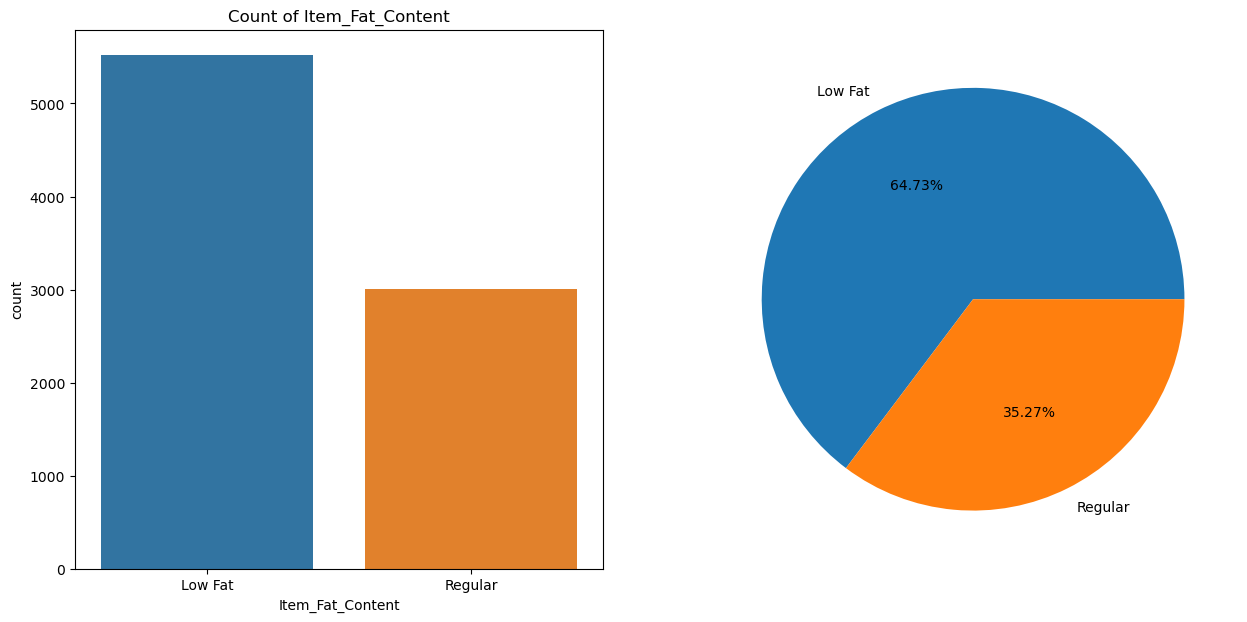

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Item_Fat_Content")                  
percentage = df1["Item_Fat_Content"].value_counts()         
labels = list(df1["Item_Fat_Content"].value_counts().index) 

sns.countplot(x = df1["Item_Fat_Content"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

People like to buy low fat product mostly

# b.Most liked Item Type

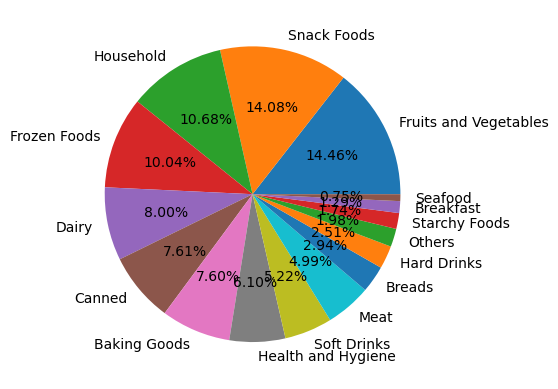

In [20]:
percentage = df1["Item_Type"].value_counts()         
labels = list(df1["Item_Type"].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

Fruits and Vegetables are most sold item type

# c.Outlet Size wise Sales

<AxesSubplot:xlabel='Outlet_Size'>

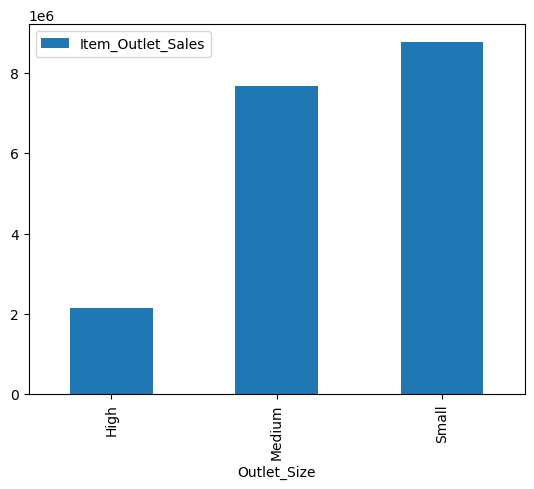

In [21]:
df1.groupby(['Outlet_Size']).sum().plot(
    kind='bar', y='Item_Outlet_Sales')

Small Size outlet is observed with the highest sales

# d.Location Wise Item Visibility

<AxesSubplot:ylabel='Item_Visibility'>

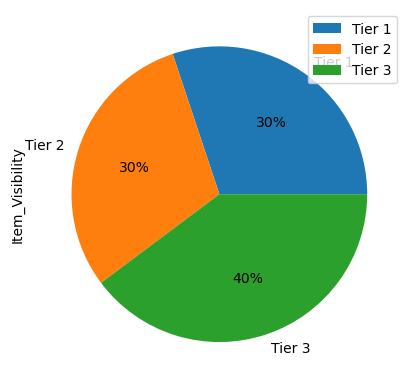

In [22]:
df1.groupby(['Outlet_Location_Type']).sum().plot(
    kind='pie', y='Item_Visibility', autopct='%1.0f%%')

Item Visibility is nearly same in all location but in Tier3 the items are more easily visible

# e.Tier1 Wise Item type

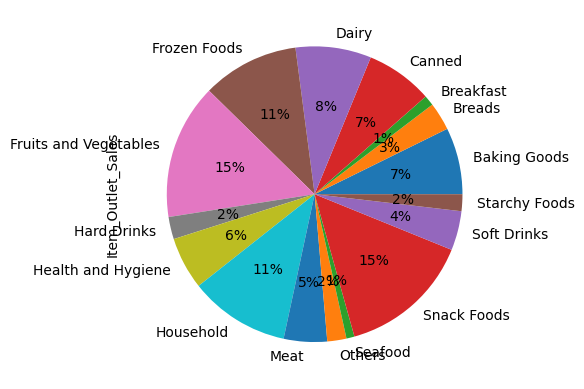

In [23]:
newdf2 = df1[(df1.Outlet_Location_Type =="Tier 1") ]
newdf2.groupby(['Item_Type']).sum().plot(
    kind='pie', y='Item_Outlet_Sales', autopct='%1.0f%%',legend=False)
plt.show()

# f.Tier2 Wise Item type

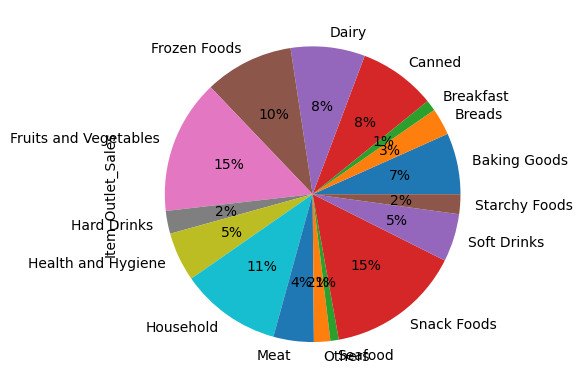

In [24]:
newdf2 = df1[(df1.Outlet_Location_Type =="Tier 2") ]


newdf2.groupby(['Item_Type']).sum().plot(
    kind='pie', y='Item_Outlet_Sales', autopct='%1.0f%%',legend=False)
plt.show()

# g.Tier3 Wise Item type

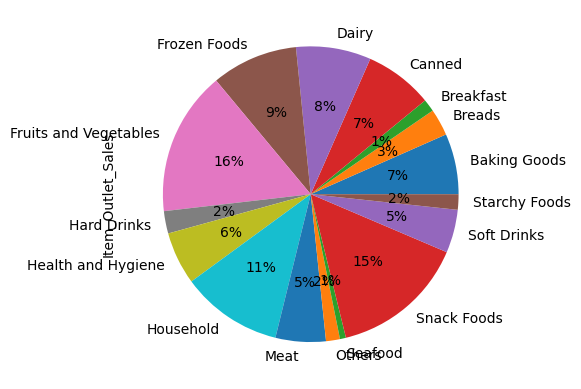

In [25]:
newdf2 = df1[(df1.Outlet_Location_Type =="Tier 3") ]


newdf2.groupby(['Item_Type']).sum().plot(
    kind='pie', y='Item_Outlet_Sales', autopct='%1.0f%%',legend=False)
plt.show()

In all Tiers snacks and Frozen foods are mostly sold which can be earn more profit as sales are high

# h.Location type wise Sales

<AxesSubplot:ylabel='Outlet_Location_Type'>

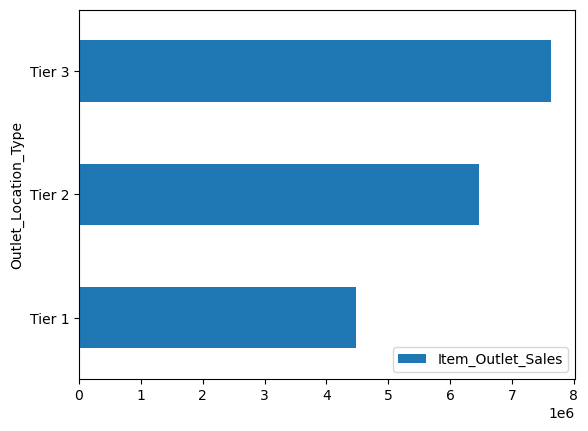

In [26]:
df1.groupby(['Outlet_Location_Type']).sum().plot(
    kind='barh', y='Item_Outlet_Sales')

Tier 3 has been identified as the most profitable outlet location as sales are high with in those region

# • Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

obj=df.select_dtypes(include="object")
for i in obj:
    df[i] = le.fit_transform(df[i])

In [28]:
obj=df_nan.select_dtypes(include="object")
for i in obj:
    df_nan[i] = le.fit_transform(df_nan[i])

# • Feature selection

In [29]:
column_correlation = df.corr()
column_correlation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048366,-0.114660,-0.029442,-0.017973,0.012853,-0.008602,-0.012772,-0.002556,0.003656,-0.001178,0.002869
Item_Weight,0.048366,1.000000,-0.027166,-0.018409,0.035973,0.026172,-0.007568,-0.012823,-0.013371,0.002929,0.000298,0.013261
Item_Fat_Content,-0.114660,-0.027166,1.000000,0.049815,-0.139434,0.006063,0.000764,0.003151,-0.001369,-0.001598,0.002199,0.018719
Item_Visibility,-0.029442,-0.018409,0.049815,1.000000,-0.036094,-0.005861,-0.105722,-0.080598,0.031617,-0.029109,-0.178473,-0.135247
Item_Type,-0.017973,0.035973,-0.139434,-0.036094,1.000000,0.032651,0.001656,0.004970,-0.000394,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.026172,0.006063,-0.005861,0.032651,1.000000,0.003319,0.005020,0.001215,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007568,0.000764,-0.105722,0.001656,0.003319,1.000000,0.079035,0.423653,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.012823,0.003151,-0.080598,0.004970,0.005020,0.079035,1.000000,0.428367,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.002556,-0.013371,-0.001369,0.031617,-0.000394,0.001215,0.423653,0.428367,1.000000,-0.590686,-0.260467,-0.060517
Outlet_Location_Type,0.003656,0.002929,-0.001598,-0.029109,0.003084,0.000232,-0.716176,-0.089216,-0.590686,1.000000,0.467219,0.089367


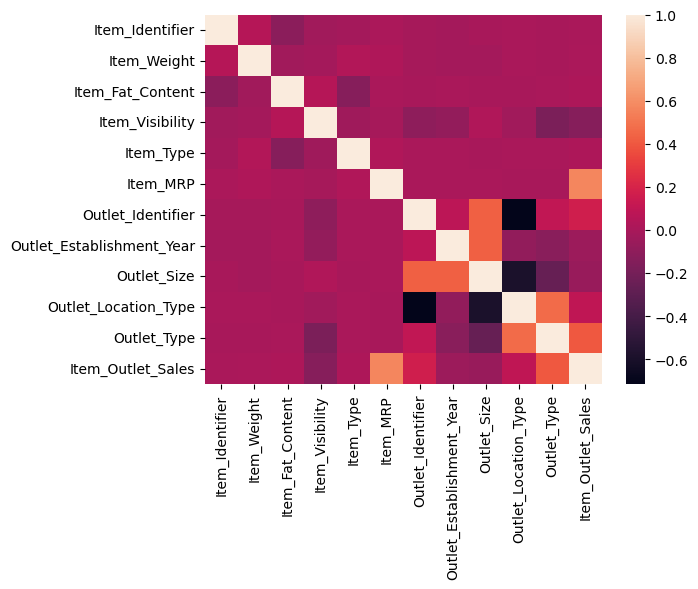

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(column_correlation);
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
X_train=df[["Item_Visibility","Item_MRP","Outlet_Identifier","Outlet_Type"]]

In [34]:
y_train=df[["Item_Outlet_Sales"]]

In [35]:
X_test=df_nan[["Item_Visibility","Item_MRP","Outlet_Identifier","Outlet_Type"]]

In [36]:
y_test=df_nan[["Item_Outlet_Sales"]]

Here y_test has all nan value 

In [37]:
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
import numpy as np

# Using the random Forest Regressor for imputing the predicted value to the nan values

Model Creating

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
RF = RandomForestRegressor(max_depth=6, random_state=42)

Fitting the model

In [41]:
RFR=RF.fit(X_train, y_train)

In [42]:
y_pred=RFR.predict(X_test)

Predicting

In [43]:
y_pred

array([1649.65300906, 1360.58552574,  557.61119169, ..., 1959.15287759,
       3703.69929368, 1293.61867829])

In [44]:
df_nan=df_nan.drop(columns=["Item_Outlet_Sales"])

In [45]:
df_nan['Item_Outlet_Sales']=y_pred

Added the target values with predicted values

In [46]:
df_nan.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,1649.653009
8524,1067,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,1360.585526
8525,1406,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,557.611192
8526,809,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,2470.650362
8527,1184,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,6222.090618


In [47]:
df = df.append(df_nan)

In [48]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.380000
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,231,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2108.041431
14200,306,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,2640.173643
14201,1412,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,1959.152878
14202,517,15.30,1,0.064709,3,214.6218,2,2007,2,1,1,3703.699294


Dataframe with nan value to the remaining cleaned data

# • Feature selection

In [49]:
column_correlation = df.corr()
column_correlation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050932,-0.111096,-0.040680,-0.012106,0.010745,-0.001135,-0.003020,0.002175,-0.002438,-0.004512,0.004873
Item_Weight,0.050932,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.023009
Item_Fat_Content,-0.111096,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.004634
Item_Visibility,-0.040680,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.143209
Item_Type,-0.012106,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.031872
Item_MRP,0.010745,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.617571
Outlet_Identifier,-0.001135,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.172567
Outlet_Establishment_Year,-0.003020,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.052874
Outlet_Size,0.002175,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.071176
Outlet_Location_Type,-0.002438,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.105107


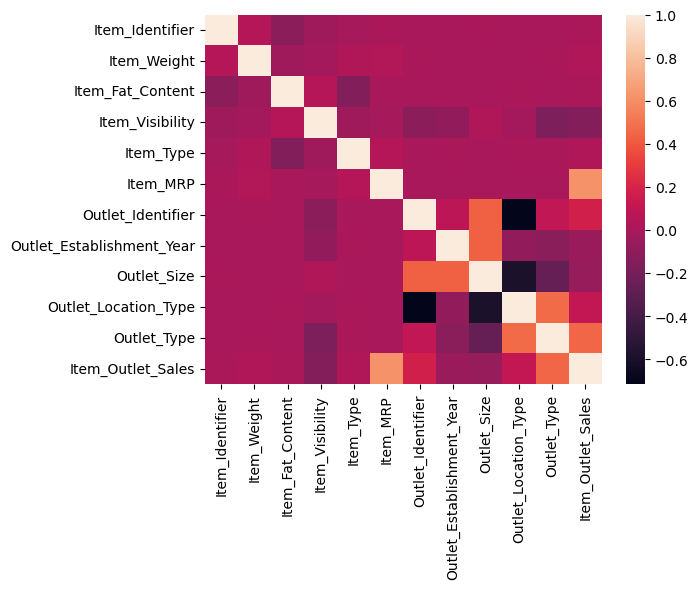

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(column_correlation);
plt.show()

In [51]:
X=df[["Item_Visibility","Item_MRP","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"]]

In [52]:
y=df[["Item_Outlet_Sales"]]


# •  Scaling and Spliting the data 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [55]:
X_train.shape

(10653, 5)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# • Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression

Model Creation

In [59]:
model = LinearRegression()

Model Fitting

In [60]:
s1=model.fit(X_train,y_train)

Train Test Score 

In [61]:
print("Training score",s1.score(X_train,y_train))
print("Testing score",s1.score(X_test,y_test))

Training score 0.5959693287417309
Testing score 0.6074347667177291


Interpretation:In Linear Regression Model 60% data lies on best fit line

# • Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor 

Model Creation


In [63]:
DT = DecisionTreeRegressor(random_state = 42) 

Model Fitting


In [64]:
DTR=DT.fit(X_train,y_train)

Train Test Score 

In [65]:
print("Training score",DTR.score(X_train,y_train))
print("Testing score",DTR.score(X_test,y_test))

Training score 0.9999691147621367
Testing score 0.3922879772506932


Interpretation:- Decision Tree Regressor model is Overfitted and not performing well

# • Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor


Model Creation


In [67]:
RF = RandomForestRegressor(max_depth=6, random_state=42)

Fitting the model

In [68]:
RFR=RF.fit(X_train, y_train)

Train Test Score 

In [69]:
print("Training score",RFR.score(X_train,y_train))
print("Testing score",RFR.score(X_test,y_test))

Training score 0.7241146378120875
Testing score 0.7261736411363515


Interpretation:- Random Forest Regressor is performing good with 72% r2-Score

# • Bagging With Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Model Creation


In [71]:
m=RandomForestRegressor()
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('r2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

r2: 0.635 (0.165)


Model Fitting


In [72]:
model_rf=m.fit(X_train,y_train)

Train Test Score 

In [73]:
print("Training score",model_rf.score(X_train,y_train))
print("Testing score",model_rf.score(X_test,y_test))

Training score 0.9544716800593525
Testing score 0.689109896022958


Interpretation:- Bagging With Random Forest model is Overfitted and not performing good

# • Boosting using Adaboost

In [74]:
from sklearn.ensemble import AdaBoostRegressor

Model Creation


In [75]:
model = AdaBoostRegressor()

# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('r2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

r2: 0.652 (0.173)


Model Fitting


In [76]:
model_ada=model.fit(X_train,y_train)

Train Test Score 

In [77]:
print("Training score",model_ada.score(X_train,y_train))
print("Testing score",model_ada.score(X_test,y_test))

Training score 0.6611641465303406
Testing score 0.6630770015206271


Interpretation:- Boosting model is performing good for train and test 

# • Stacking

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

Model Creation

In [79]:
def get_stacking():
    #define base models
    level0=list()
    level0.append(("knn",KNeighborsRegressor()))
    level0.append(("DT",DecisionTreeRegressor()))
    level0.append(("svc",SVR()))
    
    # define meta learner model
    level1 = LinearRegression()
    
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [80]:
model=get_stacking()

# evaluate the model
cv = KFold(n_splits=5)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('R2-Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

R2-Score: 0.709 (0.172)


Model Fitting


In [81]:
model_dt=model.fit(X_train,y_train)

Train Test Score 

In [82]:
print("Training score : ",model_dt.score(X_train,y_train))
print("Testing score : ",model_dt.score(X_test,y_test))

Training score :  0.7982734592736096
Testing score :  0.6871288999122802


Interpretation:- Stacking has good training score than testing

# Interpretation:- Stacking and Random Forest Regressor is performing good as comparing to others

# • Evaluation Metrics

# 1)Random Forest Regressor

In [83]:
y_pred1 = RFR.predict(X_test)

In [84]:
y_pred1

array([3191.57198916, 3113.41043864, 3109.94173408, ..., 4242.02602075,
       3382.96157394, 3210.28675382])

In [85]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
RMSE = mean_squared_error(y_test,y_pred1, squared=False)
MSE = mean_squared_error(y_test,y_pred1)
r2 = r2_score(y_test, y_pred1)
print('MSE: ',MSE, '\nRMSE:',RMSE,"\nR2-Score",r2)

MSE:  648463.6287345251 
RMSE: 805.272394121719 
R2-Score 0.7261736411363515


# 2)Stacking

In [86]:
y_pred2 = model_dt.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
RMSE = mean_squared_error(y_test,y_pred2, squared=False)
MSE = mean_squared_error(y_test,y_pred2)
r2 = r2_score(y_test, y_pred2)
print('MSE: ',MSE, '\nRMSE:',RMSE,"\nR2-Score",r2)

MSE:  740927.680340928 
RMSE: 860.7715610665399 
R2-Score 0.6871288999122802
